In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_moons
import pandas as pd

X, y = make_moons(n_samples=200, noise=0.1)
df = pd.DataFrame({
    'X': X[:, 0],
    'Y': X[:, 1],
    'class': y.astype(float)
})
df.to_csv('ushape.csv', index=False)


In [7]:
df.head()

,X,Y,class
0,0.865719,-0.529271,1.0
1,-0.787250,0.047728,0.0
2,0.940202,-0.477530,1.0
3,2.115248,0.171090,1.0
4,0.800580,-0.420293,1.0


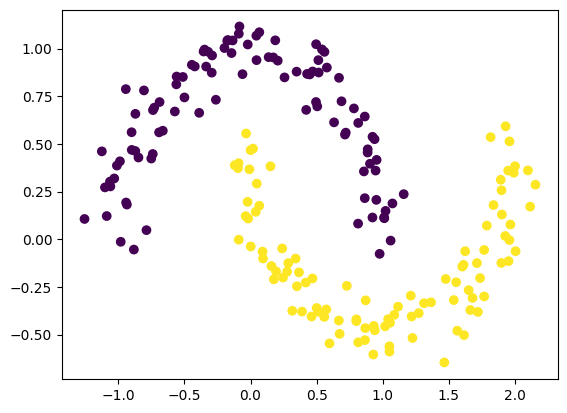

In [8]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [9]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model= Sequential()
model.add(Dense(2,activation='relu',input_dim=2)) #hidden layer and input layer
model.add(Dense(1,activation='sigmoid',input_dim=2)) #output sigmoid->binary classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.get_weights()
#these are the inital weights

[array([[ 0.0865643 ,  0.25967562],
        [ 0.22894359, -1.0206733 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.366472 ],
        [ 1.3835951]], dtype=float32),
 array([0.], dtype=float32)]

In [16]:
initial_weights= model.get_weights()

In [17]:
#set the inital weighs to zeros
initial_weights[0]=np.zeros(model.get_weights()[0].shape)
initial_weights[1]=np.zeros(model.get_weights()[1].shape)
initial_weights[2]=np.zeros(model.get_weights()[2].shape)
initial_weights[3]=np.zeros(model.get_weights()[3].shape)

In [18]:
model.set_weights(initial_weights)

In [19]:
print(initial_weights)

[array([[0., 0.],
       [0., 0.]]), array([0., 0.]), array([[0.],
       [0.]]), array([0.])]


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history= model.fit(X,y,epochs=100,validation_steps=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4582 - loss: 0.6932
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4949 - loss: 0.6931 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5141 - loss: 0.6931
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5161 - loss: 0.6931
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4697 - loss: 0.6933
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.4844 - loss: 0.6932
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4852 - loss: 0.6932 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5112 - loss: 0.6931
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4423 - loss: 0.6934
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5232 - loss: 0.6930  
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4950 - loss: 0.6932 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4354 - 

In [23]:
model.get_weights() # new weights after training

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.01231279], dtype=float32)]

In [24]:
#as we can see, since we set the initialized weights to zero, the weights didnt update
#no changes
#model will perfrom teribble

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

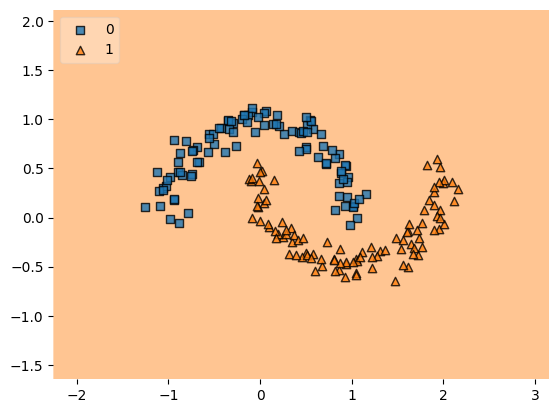

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [26]:
# if we see, bluepoints= 0,   yellow points =1
#meainig, it is telling even the blue points are yellow and not recognizing them